# EJERCICIO

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Cargar datos de trastornos de columna.
tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/column_3C_weka.csv")
tabla

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [5]:
# Separar etiquetas de variables predictoras
X = tabla.drop(tabla.columns[-1], axis = 1)
y = tabla['class']

In [9]:
# Separación de conjuntos
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Modelo

In [10]:
# Creación de modelo
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

## Validación cruzada

In [11]:
# Validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Media de cross-validation scores:", cv_scores.mean())

Cross-validation scores: [0.82       0.92       0.78       0.89795918 0.89795918]
Media de cross-validation scores: 0.8631836734693877


## Evaluación y resultados

In [12]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [13]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print("Classification report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.8709677419354839
Classification report:
                    precision    recall  f1-score   support

           Hernia       0.67      0.67      0.67        12
           Normal       0.78      0.78      0.78        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.87        62
        macro avg       0.81      0.81      0.81        62
     weighted avg       0.87      0.87      0.87        62



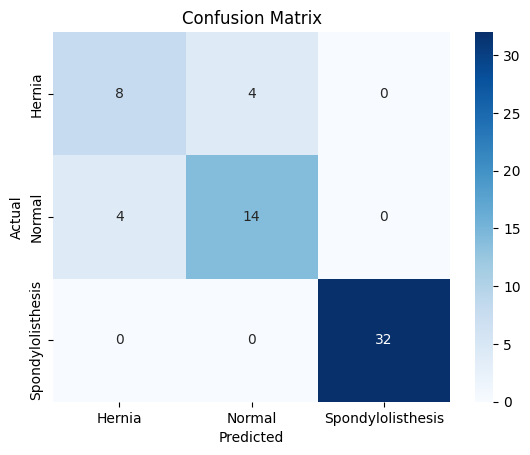

In [14]:
# Visualizar los resultados
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Intepretación**

La categoría Spondylolisthesis tiene un soporte de 32, en contraste con el soporte de 18 y 12 que tienen las categoría Normal y Hernia respectivamwnte; lo que implicaría una mayor prevalecensia de ésta categoría por sobre las demás.

Así también, además de ser la clase con mayor soporte, también es la que es mejor predicha con el puntaje máximo en precision, recall y f1-score; mientras que la Hernia es la que obtiene más bajo puntaje.

El accuracy del modelo en general es de 0.87 lo que es generalmente alto, pero podría mejorar ya que el 13% de los casos siguen sin ser predichos correctamente. La validación cruzada, de hecho, muestra un resultado similar (0.8631) que respalda este último valor de accuracy.